In [12]:
import pandas as pd
import datetime
import re
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import ttest_ind

In [13]:
#epiphan is AVIO card.
df_AVIO = pd.read_csv("epiphan.csv") 
#uhd_4K = Rybozen
df_Rybozen = pd.read_csv("uhd_4k.csv")
#hd60s = dfPlus = Elgato
df_Elgato = pd.read_csv("hd60s_plus.csv")
#df_last = last_cam = DIGITNOW
df_DIGITNOW = pd.read_csv("last_cam.csv")


In [14]:
df_AVIO = df_AVIO.iloc[0:100]
df_Rybozen = df_Rybozen.iloc[0:100]
df_Elgato = df_Elgato.iloc[0:100]
df_DIGITNOW = df_DIGITNOW.iloc[0:100]

In [15]:
type(df_Rybozen)

pandas.core.frame.DataFrame

In [16]:
Q1 = df_Rybozen.quantile(0.25)
Q2 = df_Rybozen.quantile(0.50)
Q3 = df_Rybozen.quantile(0.75)
print('Q1 =', Q1, 'Q2 =', Q2, 'Q3 =', Q3)

IQR = Q3 - Q1

print("IQR=", IQR)

upper_bound = Q3+(1.5*IQR)
lower_bound = Q1-(1.5*IQR)

print ("lower bound = " , lower_bound)

print("Q1 =", Q1, "Q3=", Q3)
#print( upper_bound, lower_bound)


Q1 = Unnamed: 0     24.75
diff          116.75
Name: 0.25, dtype: float64 Q2 = Unnamed: 0     49.5
diff          174.0
Name: 0.5, dtype: float64 Q3 = Unnamed: 0     74.25
diff          175.00
Name: 0.75, dtype: float64
IQR= Unnamed: 0    49.50
diff          58.25
dtype: float64
lower bound =  Unnamed: 0   -49.500
diff          29.375
dtype: float64
Q1 = Unnamed: 0     24.75
diff          116.75
Name: 0.25, dtype: float64 Q3= Unnamed: 0     74.25
diff          175.00
Name: 0.75, dtype: float64


/var/folders/dn/vb0n7vkj4qz3hplzpn3z8ks40000gn/T/ipykernel_96646/3181854727.py:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = df_Rybozen.quantile(0.25)
/var/folders/dn/vb0n7vkj4qz3hplzpn3z8ks40000gn/T/ipykernel_96646/3181854727.py:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q2 = df_Rybozen.quantile(0.50)
/var/folders/dn/vb0n7vkj4qz3hplzpn3z8ks40000gn/T/ipykernel_96646/3181854727.py:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = df_Rybozen.quantil

In [17]:
df_Rybozen.min()

Unnamed: 0                 0
t1            0:01:53.245000
t2            0:01:53.421000
diff                   115.0
dtype: object

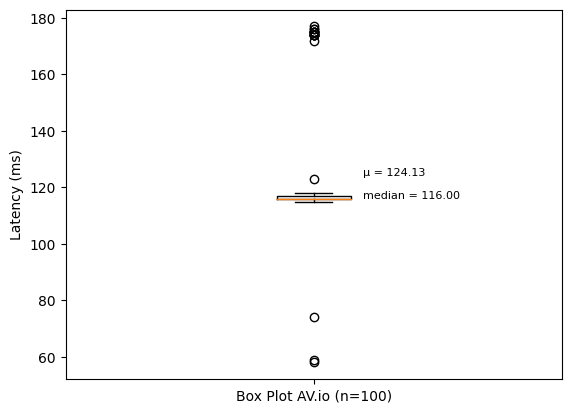

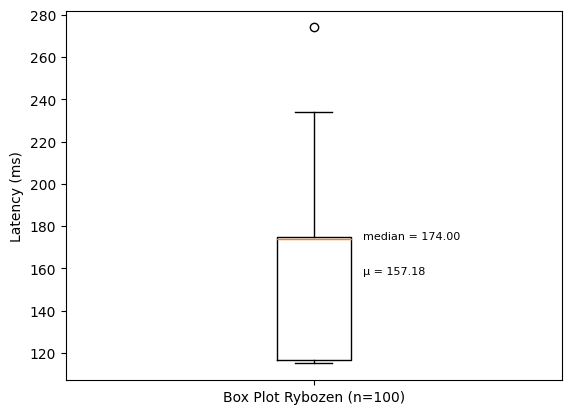

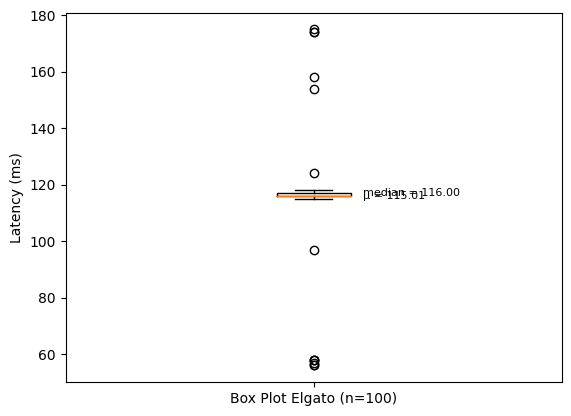

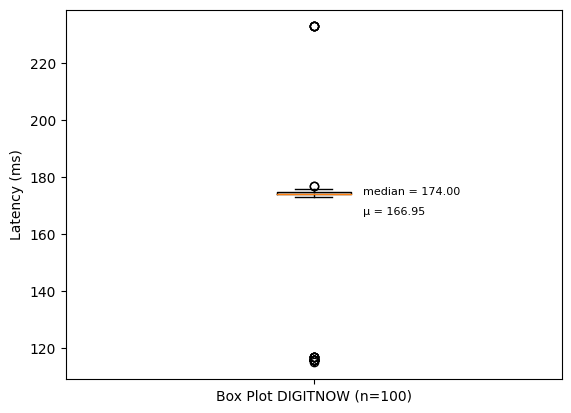

NameError: name 'df_plus' is not defined

In [18]:
plt.boxplot([df_AVIO["diff"]])
plt.xticks([1], ["Box Plot AV.io (n=100)"])
plt.ylabel("Latency (ms)")
plt.text(1.1, df_AVIO['diff'].mean(), f"\u03BC = {df_AVIO['diff'].mean():0.2f}", fontsize=8)
plt.text(1.1, df_AVIO['diff'].median(), f"median = {df_AVIO['diff'].median():0.2f}", fontsize=8)
plt.show()

plt.boxplot([df_Rybozen["diff"]])
plt.xticks([1], ["Box Plot Rybozen (n=100)"])
plt.ylabel("Latency (ms)")
plt.text(1.1, df_Rybozen['diff'].mean(), f"\u03BC = {df_Rybozen['diff'].mean():0.2f}", fontsize=8)
plt.text(1.1, df_Rybozen['diff'].median(), f"median = {df_Rybozen['diff'].median():0.2f}", fontsize=8)
plt.show()

plt.boxplot([df_Elgato["diff"]])
plt.xticks([1], ["Box Plot Elgato (n=100)"])
plt.ylabel("Latency (ms)")
plt.text(1.1, df_Elgato['diff'].mean(), f"\u03BC = {df_Elgato['diff'].mean():0.2f}", fontsize=8)
plt.text(1.1, df_Elgato['diff'].median(), f"median = {df_Elgato['diff'].median():0.2f}", fontsize=8)
plt.show()

plt.boxplot([df_DIGITNOW["diff"]])
plt.xticks([1], ["Box Plot DIGITNOW (n=100)"])
plt.ylabel("Latency (ms)")
plt.text(1.1, df_DIGITNOW['diff'].mean(), f"\u03BC = {df_DIGITNOW['diff'].mean():0.2f}", fontsize=8)
plt.text(1.1, df_DIGITNOW['diff'].median(), f"median = {df_DIGITNOW['diff'].median():0.2f}", fontsize=8) 
plt.show()

index = ['AV.io ','Rybozen ','Elgato ','DIGITNOW ']
plt.boxplot([df_AVIO["diff"],df_Rybozen["diff"],df_plus["diff"],df_last["diff"]])
plt.xticks([1,2,3,4,],['AV.io \n($458.92)','Rybozen \n($49.99)','Elgato \n($179.99)','DIGITNOW \n($19.99)'])
plt.ylabel("Latency (ms)")
plt.text(1.1, df_AVIO['diff'].mean(), f"\u03BC = {df_AVIO['diff'].mean():0.2f}", fontsize=8)
plt.text(2.3, df_Rybozen['diff'].mean(), f"\u03BC = {df_Rybozen['diff'].mean():0.2f}", fontsize=8)
plt.text(3.3, df_Elgato['diff'].mean(), f"\u03BC = {df_Elgato['diff'].mean():0.2f}", fontsize=8)
plt.text(4.0, df_DIGITNOW['diff'].mean(), f"\u03BC = {df_DIGITNOW['diff'].mean():0.2f}", fontsize=8)
plt.title('(n=100 for each card) ', fontsize = 10)
plt.suptitle('Latency comparison of video capture cards', fontsize = 15)

plt.savefig('/Users/sanashah/Documents/SPIE/comparison.png')
plt.show()

In [ ]:
plt.hist(df_AVIO["diff"])
#plt.title(f"Epiphan {df_epiphan['diff'].mean()}")
plt.title(f"AV.io")
plt.xlabel("Latency AV.io (ms)")
plt.show()

plt.hist(df_Rybozen["diff"])
#plt.title(f"4k {df_4k['diff'].mean()}")
plt.title(f"Rybozen")
plt.xlabel("Latency Rybozen (ms)")
plt.show()

plt.hist(df_Elgato["diff"])
#plt.title(f"df_plus {df_plus['diff'].mean()}")
plt.title(f"Elgato")
plt.xlabel("Latency Elgato (ms)")
plt.show()

plt.hist(df_DIGITNOW["diff"])
#plt.title(f"df_last {df_last['diff'].mean()}")
plt.title(f"DIGITNOW")
plt.xlabel("Latency DIGITNOW (ms)")
plt.show()

In [ ]:
ttest_ind(df_AVIO["diff"], df_Rybozen["diff"])

In [ ]:
ttest_ind(df_AVIO["diff"], df_Elgato["diff"])

In [ ]:
ttest_ind(df_AVIO["diff"], df_DIGITNOW["diff"])

In [ ]:
ttest_ind(df_Rybozen["diff"], df_Elgato["diff"])

In [ ]:
ttest_ind(df_Rybozen["diff"], df_DIGITNOW["diff"])

In [ ]:
ttest_ind(df_Elgato["diff"], df_DIGITNOW["diff"])

In [ ]:
print('AV.io std=', df_AVIO["diff"].std(), 'Rybozen std =', df_Rybozen["diff"].std(), 'Elegato std =', df_Elgato["diff"].std(), 'DIGITNOW std =', df_DIGITNOW["diff"].std())